In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import predict
from IPython.display import Image

In [2]:
dataset = pd.read_csv('data.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

In [3]:
def standardize(x):
    x_mean = np.mean(x)
    x_std = np.std(x)
    x_stand = (x - x_mean) / x_std
    return x_stand

x_initial = x
y_initial = y

x = standardize(x)
y = standardize(y)

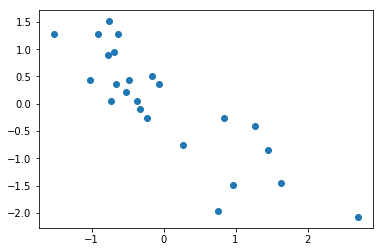

In [4]:
plt.scatter(x, y)

In [5]:
theta = predict.get_params()
print(theta)

[[ -2.14489633e-02]
 [  8.49959962e+03]]


Pour pouvoir multiplier les matrices X et theta, on ajoute une colonne de 1 à X, ainsi on obtient:

$X = \begin{bmatrix} x^{(1)} & 1 \\ ... & ...\\x^{(m)} & 1 \end{bmatrix}$

$\theta = \begin{bmatrix} a\\b \end{bmatrix}$

$y = \begin{bmatrix} y^{(1)}\\...\\y^{(m)} \end{bmatrix}$ 

In [6]:
X = np.hstack((x, np.ones(x.shape)))

In [7]:
y = y.reshape(y.shape[0],1)

## Implémantation du modèle Linéaire

Dans le sujet, l'équation du modèle à adopter est une fonction affine de la forme F(x) = ax + b

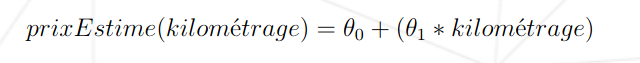

In [8]:
Image(filename='fonction_f.png')

L'équation ci-dessus correspond à la multiplication des matrices X et theta (theta = [a, b]): 

$F = X.\theta$

In [9]:
def model(X, theta):
    return X.dot(theta)

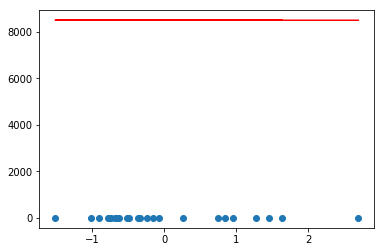

In [10]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

## La fonction coût :

La fonction coût correspond à la somme des distances entre le prix prédit par le modèle et le prix réel pour l'ensemble des points.

L'équation de la fonction coût est :

## $ J(\theta) = \frac{1}{2m} \sum_{i=0}^{m-1}
(ax + b - y)^2 $

## $ soit :  J(\theta) = \frac{1}{2m} \sum_{i=0}^{m-1}
(X.\theta - y)^2 $

In [11]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)


In [309]:
cost_function(X, y, theta)

36121597.330131717

## La méthode de descente de gradient: 

L'objectif est de trouver les valeurs optimales pour minimiser la fonction coût. La descente de gradient est un algorithme d'optimisation iterratif permettant de trouver le minimum d'une fonction convexe en convergeant progressivement vers ce point. On utilise ici cet algorithme pour trouver les valeurs a et b de theta.

Le calcul du gradient permet d'indiquer la direction et l'importance de la pente au voisinage d'un point $x_i$.
Dans la formule, $\alpha$ correspond au "pas" (ou ratio d'apprentissage) que l'on aura choisi.

## Implémentation de l'algorithme de la descente de gradient

### Formule du gradient:

### $\frac{\partial J(\theta) }{\partial \theta}$


theta = [a, b]

Le calcule du gradient au point a, correspond à la dérivé de la fonction coût $J$ en a (il en va de même pour le point b).

Ainsi, pour faire converger a et b vers des valeurs optimales on applique les formules suivantes:

###  $a_{i+1} = a_i - \alpha \frac{\partial J }{\partial a}$                        
avec : $ \frac{\partial J }{\partial a} = \frac{1}{m} \sum (ax + b - y)^2$ 

### $b_{i+1} = b_i - \alpha \frac{\partial J }{\partial b}$        
avec : $ \frac{\partial J }{\partial b} = \frac{1}{m} \sum x(ax + b - y)^2$ 

On notera que par rapport à la formule fournie dans le sujet, nous avons les correspondances suivantes:

$rationDApprentissage =  \alpha$

$prix[i] = y$

$prixEstime(kilométrage[i])$ correspond à la fonction $F(x) = ax + b$

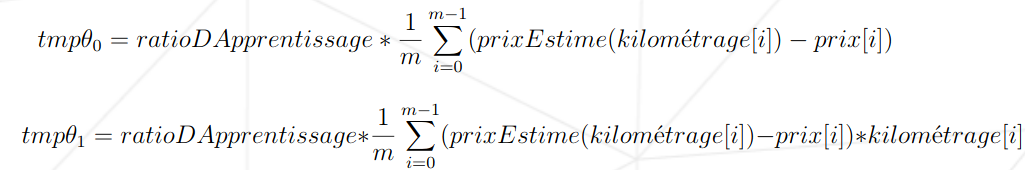

In [312]:
Image(filename='formules_thetas.png')

L'inversion de matrice nous permet de calculer simultanément les valeurs a et b de theta de la sorte:

Pour calculer le gradient:
### $\frac{\partial J(\theta) }{\partial \theta} = \frac{1}{m} X^T.(X.\theta - y)$


Pour calculer theta:
### $\theta = \theta - \alpha \frac{\partial J(\theta) }{\partial \theta}$

In [276]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [277]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

# Phase d'entrainement:

In [278]:
learning_rate=0.01
n_iterations=1800
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

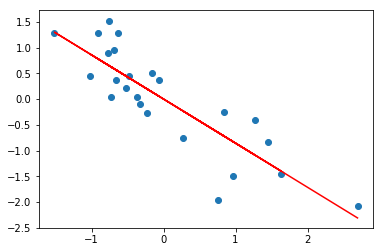

In [279]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

# Courbe d'apprentissage

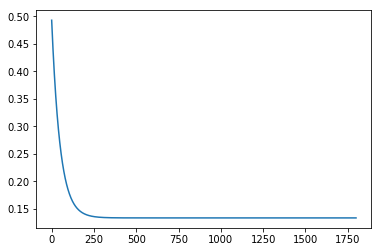

In [280]:
plt.plot(range(n_iterations), cost_history)

# Evaluation de la performance du modèle
 Plus le résultat est proche de 1, plus le modèle est performant

In [281]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [282]:
coef_determination(y, predictions)

0.73297470783149632

## Méthode des moindres carrés

Les données étant peu volumineux, il est possible de trouver les valeurs de a et b de façon plus direct par la methode des moindres  carrés, en appliquant la formule suivante:


## $ S = \sum_{i=1}^{m-1} ((y_i - (ax_i + b))^2 $

### On obtient :

## $ a = \frac{m \sum x_iy_i  -  \sum x_i \sum y_i}{m \sum x_i^2  -  (\sum x_i)^2} $

## $ b = \frac{1}{m}(\sum y_i - a \sum x_i) $

In [289]:
def MoindreCarre(x, y):
    x_sum = 0.
    x2_sum = 0.
    y_sum = 0.
    xy_sum = 0.
    
    for xi, yi in zip(x, y):
        x_sum += xi
        x2_sum += xi**2
        y_sum += yi
        xy_sum += xi * yi
        
    m = len(x)
    a = (m * xy_sum - x_sum * y_sum) / (m * x2_sum - x_sum**2)
    b = y_sum - a * x_sum / m
    return a, b

In [290]:
a2, b2 = MoindreCarre(x, y)
theta2 = np.array([a2, b2])
predictions2 = model(X, theta2)

In [291]:
coef_determination(y, predictions2)

0.73297470783149654

La précision obtenue par la méthode des moindres carrés n'est pas pas supérieur à la précision obtenue avec la méthode de descente de gradient. Donc, bien que la précision ne soit pas très élevée, on estime qu'on ne pourra pas améliorer la performance du modèle en continuant à manipuler les paramètres (valeur de $\alpha$ et le nombre d'itérations) 

In [295]:
def destandardize(a, b, xi, yi):
    y_mean = np.mean(yi)
    x_mean = np.mean(xi)
    y_std = np.std(yi)
    x_std = np.std(xi)
    
    a_destand = (y_std * a) / x_std
    div = (a * x_mean) / x_std
    b_destand = y_mean + (y_std * (b - div))
    return a_destand, b_destand

a2 = theta2[0]
b2 = theta2[1]

a = theta_final[0]
b = theta_final[1]

a2_destand, b2_destand = destandardize(a2,  b2, x_initial, y_initial)
a_destand, b_destand = destandardize(a, b, x_initial, y_initial)

print('Par la methode des moindres carré: a= {}, b={}'.format(a2_destand,  b2_destand))
print('Par la methode de descente de gradient: a= {}, b={}'.format(a_destand,  b_destand))

Par la methode des moindres carré: a= [-0.02144896], b=[ 8499.59964993]
Par la methode de descente de gradient: a= [-0.02144896], b=[ 8499.59961978]


In [296]:
def save_theta(a, b):
    with open('params.txt', 'w') as file:
        thetas = file.write(f'{a} \n{b}')

In [294]:
save_theta(float(a_destand), float(b_destand))